In [ ]:
%%capture
!pip install corus tiktoken youtokentome
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [ ]:
dataset = [next(records).text for i in range(1000)]
dataset[0]

'Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное пр

### Токенизация

Токенизация — процесс предобработки входного текста в список токенов. Обычно далее каждый токен векторизуется, и весь этот массив векторов подаётся модели на вход, с чем она начинает работать.

В моделях архитектуры Transformer токенизаторы обучаемы. Обучение токенизаторов не схоже с тем, как обучаются ML-модели, наоборот, это статистический процесс, который определяет, какие сочетания символов (подслов, слов) лучше всего выбрать для корпуса текста, с которым мы работаем.

### BPE

BPE активно используется в GPT-like моделях, обучается слиянием символов из основного корпуса, выбирая пары по наибольшей частоте встречаемости

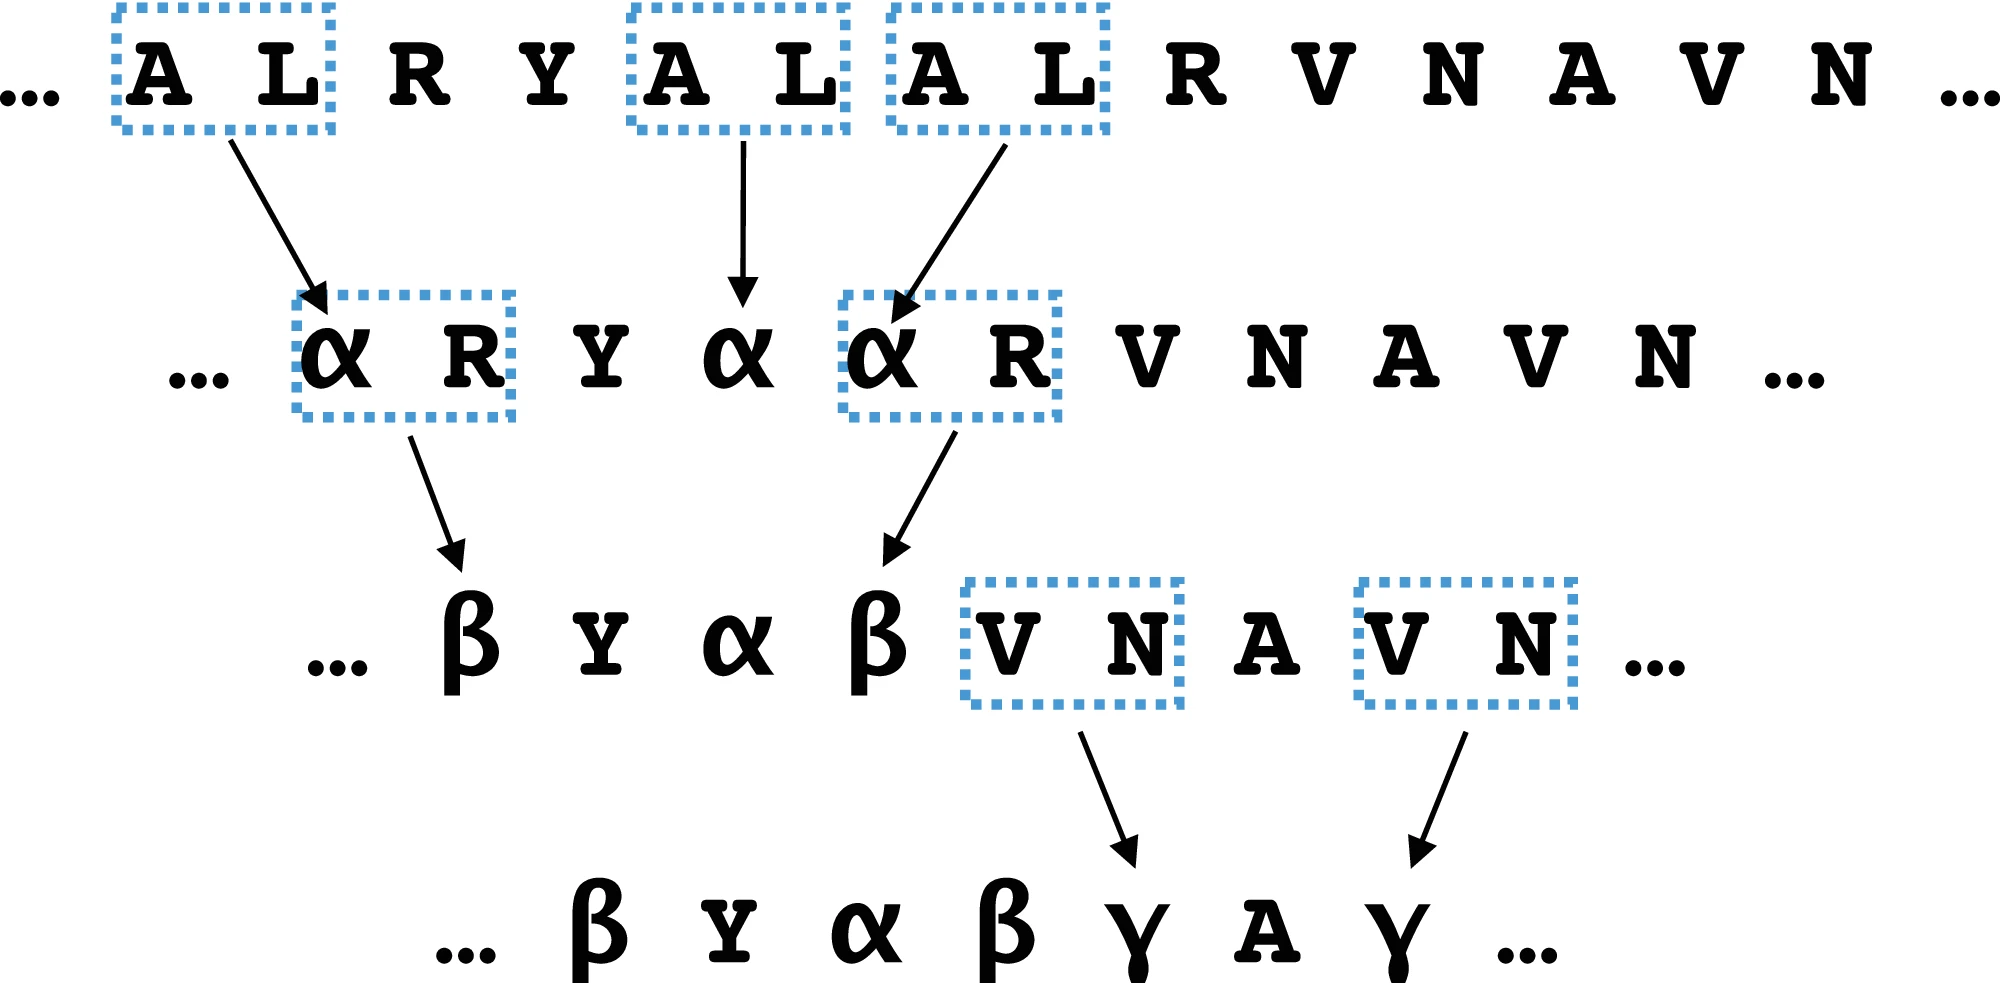

#### Нужен ли препроцессинг?

GPT-2 [encoder.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py) - GPT-2 BPE для инференса

In [ ]:
import regex as re

gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hi, how are you? I'm fine. qwe123   test"))

['Hi', ',', ' how', ' are', ' you', '?', ' I', "'m", ' fine', '.', ' qwe', '123', '  ', ' test']


#### Tiktoken

[tiktoken](https://github.com/openai/tiktoken) - `is a fast BPE tokeniser for use with OpenAI's models`

In [ ]:
import tiktoken

enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]


In [ ]:
from tiktoken._educational import *

# Train a BPE tokeniser on a small amount of text
enc = train_simple_encoding()

# Visualise how the GPT-4 encoder encodes text
enc = SimpleBytePairEncoding.from_tiktoken("cl100k_base")

In [ ]:
enc.encode("hello world aaaaaaaaaaaa")

hello
hello
hello
hello
hello

 world
 world
 world
 world
 world
 world

 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa
 aaaaaaaaaaaa



[15339, 1917, 264, 70540, 33746]

[tiktokenizer demo](https://tiktokenizer.vercel.app/)

#### YouTokenToMe

[YouTokenToMe](https://github.com/vkcom/YouTokenToMe) представляет собой  текстовый токенизатор, ориентированный на эффективность вычислений. В настоящее время он реализует Byte Pair Encoding  (BPE). Эта реализация намного быстрее в обучении и токенизации, чем Hugging Face, fastBPE и SentencePiece. В некоторых тестовых случаях она работает в 90 раз быстрее.

In [ ]:
import youtokentome as yttm

In [ ]:
with open('dataset.txt', "w") as f:
    for i in range(1000):
        print(dataset[i], file=f)

In [ ]:
%%time
model_name = 'bpe_vk.model'
yttm.BPE.train(data='dataset.txt', vocab_size=5000, model=model_name)

CPU times: user 660 ms, sys: 323 ms, total: 983 ms
Wall time: 825 ms


In [ ]:
bpe = yttm.BPE(model=model_name)
print(bpe.encode([dataset[0]], output_type=yttm.OutputType.ID))

[[1985, 4588, 587, 2396, 355, 769, 212, 236, 839, 198, 3682, 300, 323, 1080, 827, 476, 2269, 2998, 200, 245, 243, 4738, 4862, 797, 1692, 409, 375, 1282, 202, 480, 14, 440, 186, 244, 559, 1861, 497, 33, 2754, 472, 202, 3128, 1364, 266, 227, 899, 2879, 477, 312, 2881, 216, 604, 18, 243, 1633, 187, 839, 2941, 3434, 1553, 2909, 1240, 2582, 1320, 265, 1827, 275, 546, 17, 18, 524, 236, 231, 341, 2281, 669, 900, 3327, 4241, 736, 3715, 1651, 231, 808, 443, 3946, 1694, 314, 278, 1006, 198, 186, 202, 480, 210, 699, 29, 4185, 360, 238, 2280, 4357, 189, 357, 108, 106, 128, 66, 499, 236, 639, 261, 2622, 228, 4389, 264, 3096, 2998, 200, 245, 577, 1319, 814, 1977, 10, 2378, 751, 209, 1448, 22, 389, 4582, 3108, 524, 209, 24, 287, 4817, 186, 192, 300, 3240, 440, 186, 4870, 3729, 957, 911, 956, 2223, 4357, 1515, 3826, 25, 658, 4892, 3468, 696, 186, 407, 679, 191, 4207, 187, 415, 1689, 1307, 4150, 1248, 3525, 2807, 200, 417, 951, 193, 299, 3308, 376, 198, 2647, 499, 1525, 4928, 186, 1296, 480, 1528, 2737

In [ ]:
print(bpe.encode([dataset[0]], output_type=yttm.OutputType.SUBWORD))

[['▁Ав', 'стрий', 'ские', '▁правоохранитель', 'ные', '▁орга', 'ны', '▁не', '▁представи', 'ли', '▁доказа', 'тель', 'ств', '▁нару', 'шения', '▁россий', 'скими', '▁биатло', 'ни', 'ста', 'ми', '▁антидо', 'пинговых', '▁прави', 'л.', '▁Об', '▁этом', '▁сообщил', '▁по', 'со', 'л', '▁России', '▁в', '▁В', 'ене', '▁Дмитрий', '▁Л', 'ю', 'бин', 'ский', '▁по', '▁итогам', '▁встре', 'чи', '▁у', 'пол', 'номо', 'чен', 'ного', '▁адвока', 'та', '▁ди', 'п', 'ми', 'ссии', '▁с', '▁представи', 'телями', '▁прокура', 'туры', '▁страны,', '▁передает', '▁ТАСС.', '▁«Д', 'ей', 'ствует', '▁пре', 'зу', 'м', 'п', 'ция', '▁не', 'ви', 'нов', 'ности.', '▁Ка', 'ких', '-либо', '▁огранич', 'ений', '▁свободы', '▁перед', 'ви', 'жения', '▁для', '▁команды', '▁нет', '»,', '▁—', '▁добави', 'ли', '▁в', '▁по', 'со', 'ль', 'стве', '.', '▁Международ', 'ный', '▁со', 'юз', '▁биатлонист', 'ов', '▁(', 'I', 'B', 'U', ')', '▁также', '▁не', '▁будет', '▁при', 'меня', 'ть', '▁санкции', '▁к', '▁российским', '▁биатло', 'ни', 'ста', 'м.', '▁Все',

### WordPiece

WordPiece используется преимущественно в BERT-like моделях, также обучается слиянием, но используется не частота встречаемости, а правдоподобие

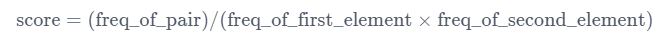

сохраняет только конечный словарь, а не выученные правила слияния - [пример](https://huggingface.co/learn/nlp-course/ru/chapter6/6#tokenization-algorithm)

### SentencePiece

In [ ]:
import sentencepiece as spm

In [ ]:
import os

options = dict(
  # input spec
  input="dataset.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=1000,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab[:40]

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39]]

In [ ]:
ids = sp.encode("привет как дела??")
print(ids)

[335, 718, 566, 374, 281, 967, 967]


In [ ]:
print([sp.id_to_piece(idx) for idx in ids])

['▁при', 'вет', '▁как', '▁де', 'ла', '?', '?']


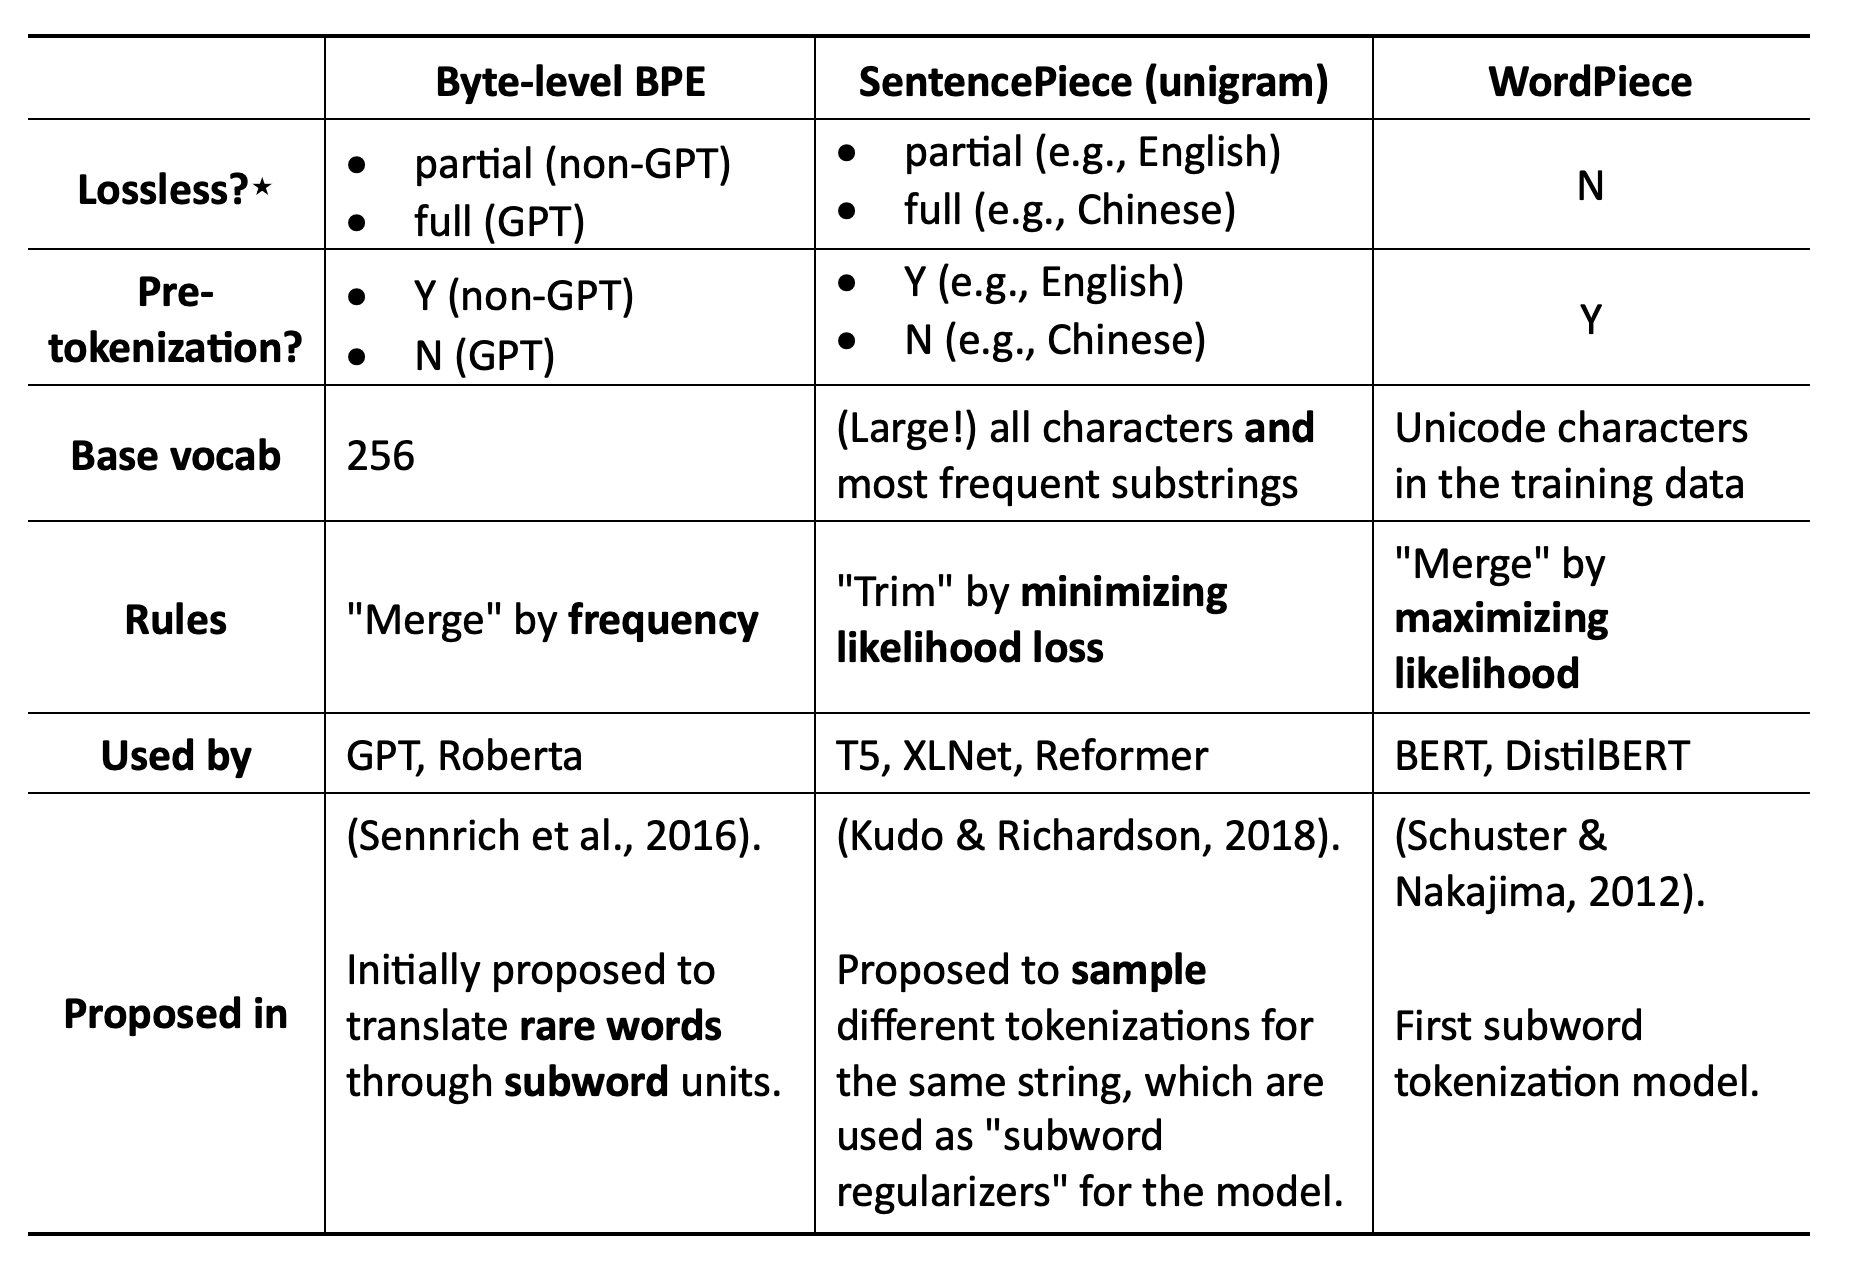

### Важность токенизации

- Токенизация напрямую влияет на стоимость использования любой модели, а также на длину контекста и количество вычислений
- Правильно токенизированная последовательность также сильно влияет на качество модели из-за появления символов, которых модель не видела или из-за особенностей некоторых языков, где нет, например, пробелов

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
print(model.tokenizer.vocab_size)

tokenized_data = model.tokenize(["tokenizer tokenizes text into tokens"])
tokens    =  model.tokenizer.convert_ids_to_tokens(tokenized_data["input_ids"][0])
print(tokens)

30522
['[CLS]', 'token', '##izer', 'token', '##izes', 'text', 'into', 'token', '##s', '[SEP]']


#### Emoji и неизвестные токены

In [ ]:
# all-MiniLM-L6-v2
tokenizer = model.tokenizer._tokenizer
print(tokenizer.encode("You can break it 😞").tokens)

# tiktoken/OpenAI
enc = tiktoken.encoding_for_model("gpt-4o")
token_data = enc.encode("You can break it 😞")
tokens = [enc.decode_single_token_bytes(number) for number in token_data]
print(tokens)

['[CLS]', 'you', 'can', 'break', 'it', '[UNK]', '[SEP]']
[b'You', b' can', b' break', b' it', b' \xf0\x9f\x98', b'\x9e']


#### Опечатки

In [ ]:
token_data = enc.encode("I hve received wrong pckage")
tokens = [enc.decode_single_token_bytes(number) for number in token_data]
print(tokens)

[b'I', b' h', b've', b' received', b' wrong', b' p', b'ck', b'age']
